## Problema 1

### Pruebas QEDF

Las pruebas QEDF (Quadratic Empirical Distribution Function) se basan en la idea de cuantificar una distancia(en $L^2$) entre la distribución empírica obtenida con la muestra y la distribución $F_0(x)$ propuesta bajo la hipótesis nula.

\begin{eqnarray}
H_0 : F_X(x,\theta) &=& F_0(x,\theta)\\
H_1 : F_X(x,\theta) &=& F_0(x,\theta)
\end{eqnarray}

Donde el parámetro de $F_0(x,\theta)$ en este caso la supondremos conocido, de tal modo que la $F_0$ es una distribución completamente conocida.(F_m(x)-F_0(x))
La idea de las estadística QEDF es cuantificar la discrepancia al cuadrado y luego integrar
respecto a la distribución propuesta bajo $H_0$. 
\textbf{Definición} (QEDF Statistic). Definimos la estad´ıstica QEDF para probar bondad de ajuste
como:
\begin{equation}
Q_m(x)=m\int_{-\infty}^\infty(F_m(x)-F_0(x))^2 \psi(x)dF_0(x)
\end{equation}
Donde $F_m(x)$ es la distribución empírica obtenida con la muestra y $F_0(x)$ la distribución bajo $H_0$ . Por otro lado $\psi(x)$ es una función ponderadora que nos ayuda a darle peso a la distancia en $L^2$ en cada x.

### Prueba Anderson Darling 
Se obtiene haciendo que la función de ponderación tome la siguiente forma:
\begin{eqnarray}
    \psi(x)=\dfrac{1}{F_0(x)(1-F_0(x))}
\end{eqnarray}

Con la ponderación las colas de la distribución tienen mas peso, la prueba es capaz de detectar diferencia entre las colas de la distribución más fácilmente.
Esta prueba es una de las mas potente para detectar normalidad.
Por lo anterior el estadístico de prueba queda como:
\begin{eqnarray}
A_m^2=m\int_{-\infty}^\infty \dfrac{(F_m(x)-F_m(x))^2}{F_m(x)(1-F_0(x))}dF_0(x)
\end{eqnarray}
Haciendo el cambio de variable $u=F_x(x)$ el estadístico anterior nos queda como:
\begin{eqnarray}
A_m^2=m\int_{-\infty}^\infty \dfrac{(F_m(u)-u)^2}{F_m(u)(1-u)}du
\end{eqnarray}
La integral anterior tiene solución analitica y es:
\begin{eqnarray}
A_m^2=-m-\dfrac{1}{m}\sum_{i=1}^{m}(2i-1)\log(u_i)+\log(1-u_{m+1-i})
\end{eqnarray}


In [164]:
ADTestNormal<-function(n,m,mu,s2){
    sum=0
    A=rep(0,n)
    for (j in 1:n){
    norm<-pnorm(sort(rnorm(m,mu,s2)),mu, s2)    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(norm)+log(-norm[i]+1)))
    sum=-m-sum  
    A[j]=sum            
}
    return(sort(A))
}

In [167]:
n<-100000
m<-50
mu<-2.34
s2<-1.27
h=ADTestNormal(n,m,mu,s2)

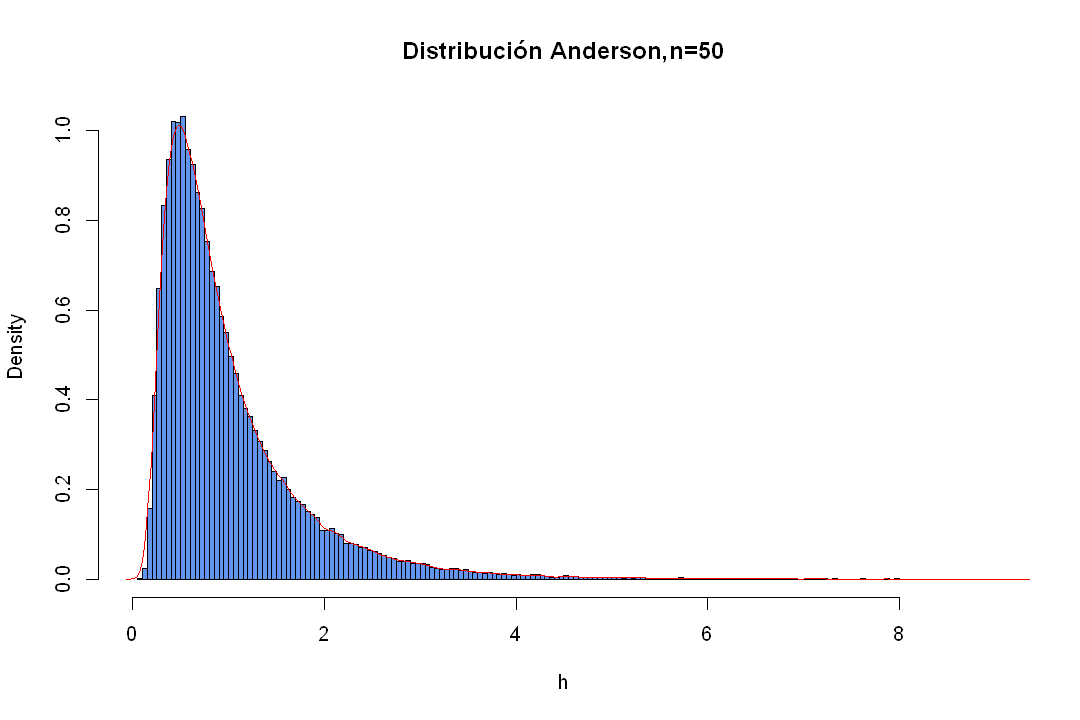

In [168]:
library(repr)
options(repr.plot.width=9, repr.plot.height=6)
hist(h,freq=FALSE, breaks=300, main="Distribución Anderson,n=50",
     col="cornflowerblue",xlim = c(0, 9.0))
lines(density(h),col="red")

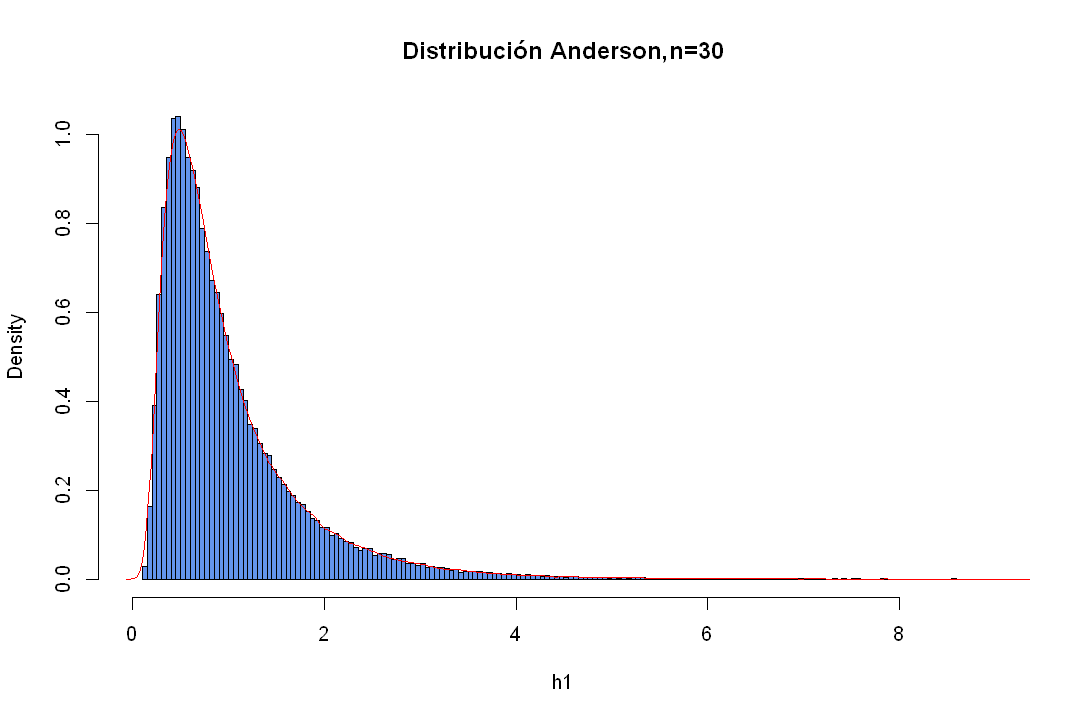

In [169]:
h1=ADTestNormal(100000,30,mu,s2)
options(repr.plot.width=9, repr.plot.height=6)
hist(h1,freq=FALSE, breaks=300, main="Distribución Anderson,n=30",
     col="cornflowerblue",xlim = c(0, 9.0))
lines(density(h),col="red")

In [170]:
print("Cuantiles de la distribución Anderson-Darling m=50")
print(round(quantile(h1,c(0.75,0.9,0.95,0.99)),3))
Q95<-round(quantile(h1,c(0.75,0.9,0.95,0.99)),3)[3]

[1] "Cuantiles de la distribución Anderson-Darling m=50"
  75%   90%   95%   99% 
1.252 1.941 2.509 3.877 


In [171]:
#funcion de discrepancia
disc<-function(m,mu,s2,data){
    sum=0
    norm<-sort(pnorm(data,mu,s2))    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(norm)+log(-norm[i]+1)))
    sum=-m-sum  
    return(sum)
}

In [172]:
data<-c( 1.662, 1.624, 1.508, 2.571, 2.032, 1.743, 1.475, 1.329, 1.951,
3.171, 0.350, 1.249, 3.483, 1.974, 2.165)
m1<-length(data)
print("La discrapancia es de:")
disc(m1,mu,s2,data)

[1] "La discrapancia es de:"


[1] 2.273465

Como el valor cae dentro de la región de aceptación para el cuantil de $0.95$ entonces podemos decir que no se rechaza la
hipotesis nula con un nivel de confianza de $0.95$

Ahora, supongan que no conocen los valores de $(\mu,\sigma)$, así que la hipótesis que pueden probar es
$$H_0 : \text{Los datos provienen de una población normal}$$
Aquí la idea es estimar los parametros de la distribución con la muestra generada, sabemos que un buen estimado de $\mu$ es $\bar{x}$ y para $\sigma^2$ es $s^2$

In [178]:
ADTestNormal1<-function(n,m){
    sum=0
    A=rep(0,n)
    for (j in 1:n){
    x=rnorm(m,0,1)
    mu<-mean(x)
    s2<-var(x)*(m/(m-1))
    z<-(x-mu)/sqrt(s2)
    norm<-pnorm(sort(z),0, 1)    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(norm)+log(-norm[i]+1)))
    sum=-m-sum 
    A[j]=sum            
}
    return(sort(A))
}

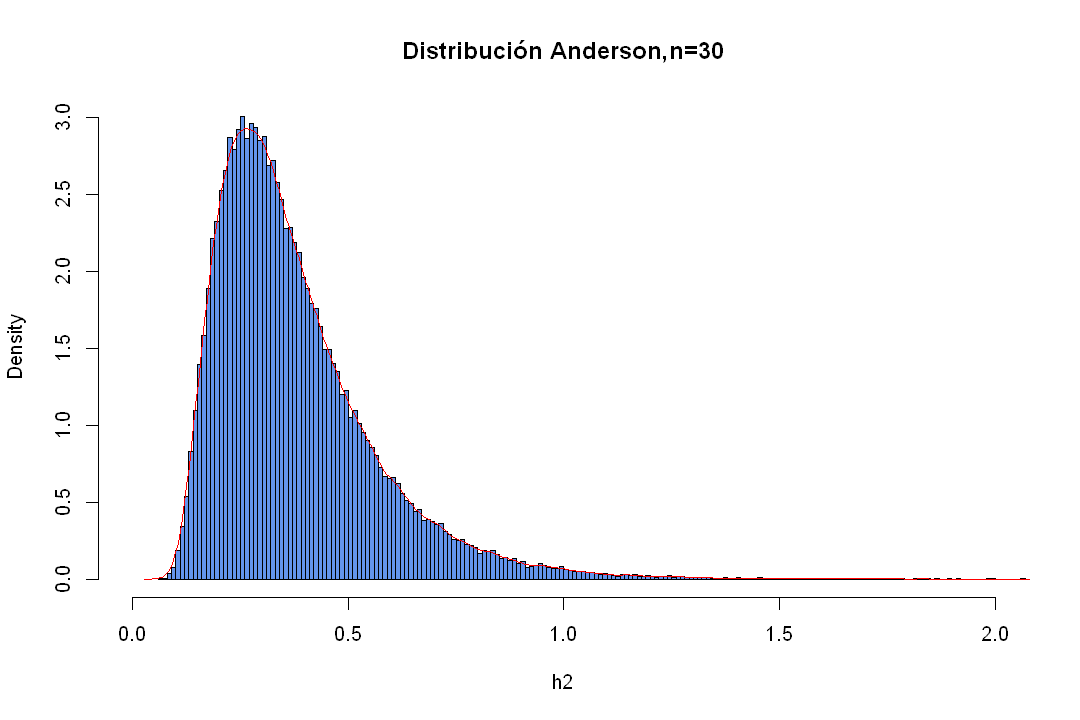

In [179]:
h2=ADTestNormal1(100000,50)
options(repr.plot.width=9, repr.plot.height=6)
hist(h2,freq=FALSE, breaks=300, main="Distribución Anderson,n=30",
     col="cornflowerblue",xlim = c(0, 2.0))
lines(density(h2),col="red")

In [181]:
print("Cuantiles de la distribución Anderson-Darling m=50")
print(round(quantile(h2,c(0.75,0.9,0.95,0.99)),3))

[1] "Cuantiles de la distribución Anderson-Darling m=50"
  75%   90%   95%   99% 
0.459 0.616 0.734 1.006 


In [182]:
data1<-c(6.466,7.528,6.55682,6.3396,6.38785,7.60078,5.72222,5)
m2<-length(data1)
s<-var(data1)
med<-mean(data1)
print("La discrapancia es de:")
disc(m2,med,s,data1)

[1] "La discrapancia es de:"


[1] 0.4389356

Por tanto no se rechaza $H_0$ con nivel de confianza de $0.75$.

Se generan muestras de una Cauchy y se transforman como si fueran normales. Usando el cuantil 0.95 que encontraron anteriormente, 
para decidir si rechazan la hipótesis se calcula la tasa de rechazo.

In [189]:
cau<-function(n,m,loc,sca){
    sum=0
    A=rep(0,n)
    for (j in 1:n){
    cau<-pnorm(sort(rcauchy(m,loc,sca)),mu, s2)    
    i=rev(c(1:m))     
    sum=(1/m)*sum((2*rev(i)-1)*(log(cau)+log(-cau[i]+1)))
    sum=-m-sum  
    A[j]=sum            
}
    return(sort(A))
}

In [190]:
A<-cau(n,30,2.34,1.27)
cont=(sum((A>=q95)*1)/n)*100
print("La tasa de rechazo es ")
print(cont)

[1] "La tasa de rechazo es "
[1] 98.688


## Problema 2: Una moneda con memoria

Supongamos que tenemos una moneda que se acuerda de lo que salió en el volado anterior. Específicamente, si $X_{n}$ denota el resultado de $n$-ésimo volado y denotamos como ``0'' al hecho de que aparezca águila, vamos a suponer que 
\begin{equation}
P[X_{n}=1|X_{n-1}=0]=\theta \mbox{ y } P[X_{n}=0|X_{n-1}=0]=\mu, \hspace{1cm}(1)\nonumber
\end{equation}
con $\theta, \mu \in (0,1)$. ¿Cuál es la probabilidad de obtener un águila en un lanzamiento cualquiera, independientemente de lo que pasó en el volado anterior?

Definimos entonces 
\begin{equation*}
X_{n}=\mbox{El resultado del  $n$-ésimo volado}.
\end{equation*}
Como estamos denotando a  "0" al hecho de que aparezca águila entonces al hecho de salga sol la denotamos como "1".
De este modo, las variables aleatorias $X_{n}\in \{0,1\}$ y esto para cada $n\in N$.\\
Por hipótesis tenemos una moneda que se acuerda de lo que salió en el volado anterior, lo que nos sugiere que podemos 
``interpretar'' a la sucesión $\{X_{n}\}_{n\geq 1}$ como una cadena de Markov y con espacio de estados $S=\{0, 1\}$.\\
Luego, calculemos la matriz de transición de esta cadena. Para esto, ocuparemos las probabilidades de transición dadas en la expresión anterior y también usaremos que la matriz de transición debe ser una matriz estocástica. Así que la matriz buscada es 

\begin{equation}
P=\left(\begin{matrix}
1-\theta&\theta\\
\mu& 1-\mu
\end{matrix}\right). \hspace{1cm}(2) \nonumber
\end{equation}
Para una cadena de Markov en general se sabe que podemos encontrar la distribución de cada variable $X_{n}$, $n\in N\setminus\{0\}$ si conocemos su matrix de transición y la distribución de $X_{0}$. Y se puede calcular como 
\begin{equation}
P[X_{n}=y]=\sum_{x\in S}P(X_{0}=x)p^{n}(x,y),   \hspace{1cm}(3) \nonumber
\end{equation}
donde $S$ es el espacio de estado y $p^{n}(x,y)=P(X_{n}=y|X_{0}=x)$. Pero, la expresión enterior es equivalente a 


\begin{equation}
P[X_{n}=y]=({\bf{\pi_{0}}}\hat{P}^{n})_{y}, \hspace{1cm}(4)\nonumber
\end{equation}
dode ${\bf{\pi_{0}}}=[P(X_{0}=0), \ldots,P(X_{0}=k)]$ (suponiendo que el espacio de estados es $S=\{0, \ldots, k\}$) y $\hat{P}$ es la matriz de transición de la cadena.\\
Regresando a nuestro problema, usando que  ${\bf{\pi_{0}}}=[P(X_{0}=0), P(X_{0}=1)]$ y Ec(2), entonces de 4 se sigue que 
\begin{equation}
P(X_{n}=0)=\left([P(X_{0}=0), P(X_{0}=1)]\left(\begin{matrix}
1-\theta&\theta\\
\mu& 1-\mu
\end{matrix}\right)^{n}\right)_{0}. \hspace{1cm}(5)
\end{equation}
Resolviendo la ecuación 5 se sigue que 
\begin{equation}
P(X_{n}=0)=\frac{\mu}{\mu+\theta}+(1-\theta-\mu)^{n}\left(P(X_{0}=0)-\frac{\mu}{\mu+\theta}\right).\hspace{1cm}(6)\nonumber
\end{equation}
Análogamente se puede demostrar que 


\begin{equation}
P(X_{n}=1)=\frac{\theta}{\mu+\theta}+(1-\theta-\mu)^{n}\left(P(X_{0}=1)-\frac{\theta}{\mu+\theta}\right). \hspace{1cm}(7)
\end{equation}

Observemos que, para calcular tanto $P(X_{n}=0)$  como  $P(X_{n}=0)$  necesitamos conocer la distribución de $X_{0}$.
Como $\theta, \mu \in (0,1)$ entonces $\lim_{n\to \infty}(1-\theta-\mu)^{n}=0$. Así que de Ec.(5) y Ec(6) se infiere que 
\begin{equation}
\lim_{n\to \infty}P(X_{n}=0)=\frac{\mu}{\mu+\theta} \mbox{ y } \lim_{n\to \infty}P(X_{n}=1)=\frac{\theta}{\mu+\theta},\hspace{1cm}(8)\nonumber
\end{equation}
y esto pasa independientemente de la distribución de $X_{0}$.\\
De esta manera, si proponemos que ${\bf{\pi_{0}}}=(\frac{\mu}{\mu+\theta},\frac{\theta}{\mu+\theta})$ (qué es lo que nos sugiere la
expresión 8 entonces en Ecs.(6 y 7) se sigue que, 
\begin{eqnarray}
P(X_{n}=0)&=&\frac{\mu}{\mu+\theta}+(1-\theta-\mu)^{n}(0)\nonumber\\
&=&\frac{\mu}{\mu+\theta} \mbox{ y}\\
P(X_{n}=1)&=&\frac{\theta}{\mu+\theta}+(1-\theta-\mu)^{n}0\nonumber\\
&=&\frac{\theta}{\mu+\theta}.
\end{eqnarray}
Y las probabilidades $P(X_{n}=0)$ y $P(X_{n}=1)$ ya no dependen de la $n$.\\
Si suponemos que $(\mu, \theta) = (0.42, 0.35)$, entonces $P(X_{n}=0)=\frac{0.42}{0.42+0.35}=0.54$ y $P(X_{n}=1)=\frac{0.35}{0.42+0.35}=0.459$, esto siempre y cuando si proponemos  ${\bf{\pi_{0}}}=(\frac{\mu}{\mu+\theta},\frac{\theta}{\mu+\theta})$.\\
Ahora ya sabemos a que mas o menos debemos de llegar si resolvemos el problema numéricamente.

### Simulación

In [199]:
estados <- c('0', '1')
pi0 <- c(0.65,0.35) # distribucion inicial
names(pi0) <- estados
p<- rbind(c(0.65,0.35), c(.42, .58))
dimnames(p) <- list(estados, estados)
p

,0,1
0,0.65,0.35
1,0.42,0.58


In [205]:
func.inic <- cumsum(pi0)
func.act <- t(apply(p, 1, cumsum))

In [209]:
n <-6523
U <- runif(n) 
X <- numeric(n) * NA 
j = 1; while(U[1] > func.inic[j]) j = j + 1;
X[1] <- estados[j]
for (i in 2:n) {
j = 1; while(U[i] > func.act[X[i - 1], j]) j = j + 1;
X[i] <- estados[j]
}

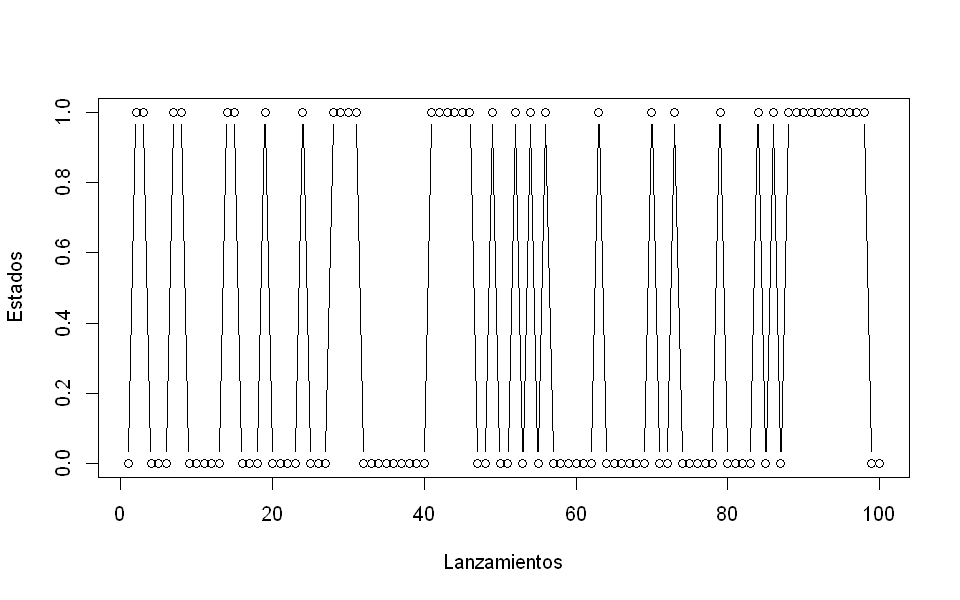

In [218]:
options(repr.plot.width=8, repr.plot.height=5)
plot(X[1:100],type="b",xlab="Lanzamientos",ylab="Estados")

In [ ]:
mu<-0.42
theta<-0.35
